破产公司预测

In [ ]:
import pandas as pd
import os 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import ensemble
from sklearn import neural_network
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import lightgbm as lgb
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support, roc_auc_score)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

数据检视

In [ ]:
data_dir="C:\\Users\\YuNHz\\Desktop"
fname=os.path.join(data_dir,"破产公司数据检视.csv")
f=open(fname,encoding="utf-8")
df = pd.read_csv(f)
f.close()
print(type(df))
pd.set_option('display.max_columns', None)
df = df.dropna()
df.head()

<class 'pandas.core.frame.DataFrame'>


,Quick Ratio,Current Ratio,Debt ratio,Equity to Liability,Total Asset Turnover,Inventory Turnover Rate,Net Income to Total Assets,Net Income to Stockholder's Equity,Bankrupt?
0,0.002259,0.001208,0.207576,0.564050,0.086957,0.000182,0.716845,0.827890,0
1,0.006016,0.004039,0.171176,0.570175,0.064468,0.000182,0.795297,0.839969,0
2,0.011543,0.005348,0.207516,0.563706,0.014993,0.000182,0.774670,0.836774,0
3,0.004194,0.002896,0.151465,0.564663,0.089955,0.000182,0.739555,0.834697,1
4,0.006022,0.003727,0.106509,0.575617,0.175412,0.000163,0.795016,0.839973,0


In [ ]:
for name in df:print(name)

Quick Ratio
Current Ratio
Debt ratio
Equity to Liability
Total Asset Turnover
Inventory Turnover Rate
Net Income to Total Assets
Net Income to Stockholder's Equity
Bankrupt?


In [ ]:
df.isnull().sum()

Quick Ratio                           0
Current Ratio                         0
Debt ratio                            0
Equity to Liability                   0
Total Asset Turnover                  0
Inventory Turnover Rate               0
Net Income to Total Assets            0
Net Income to Stockholder's Equity    0
Bankrupt?                             0
dtype: int64

In [ ]:
df1 = df[["Quick Ratio","Current Ratio","Debt ratio","Interest Coverage Ratio","Total Asset Turnover","Inventory Turnover Rate","Net Income to Total Assets","Net Income to Stockholder's Equity","Bankrupt?"]]

In [ ]:
print(df1['Bankrupt?'].value_counts())
print('_'* 30)
print('Companies that went bankrupt: ', round(df1['Bankrupt?'].value_counts()[0]/len(df1) * 100,1), '% of whole data set')
print('Companies that did not go bankrupt: ', round(df1['Bankrupt?'].value_counts()[1]/len(df1) * 100,1), '% of whole data set')

0    6599
1     220
Name: Bankrupt?, dtype: int64
______________________________
Companies that went bankrupt:  96.8 % of whole data set
Companies that did not go bankrupt:  3.2 % of whole data set


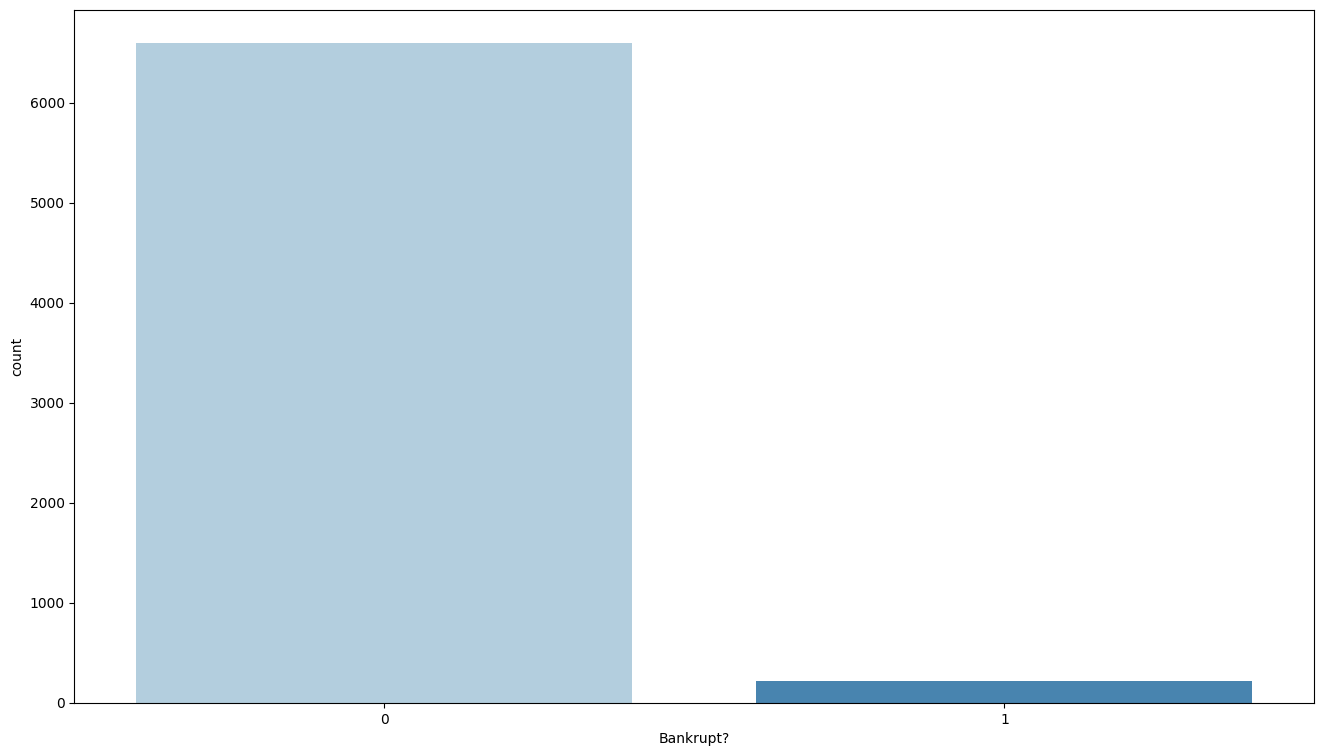

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Bankrupt?',data = df1,palette ='Blues' )
plt.show()

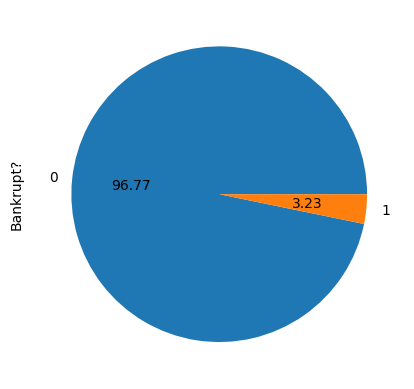

In [ ]:
df1['Bankrupt?'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

In [ ]:
df1.dtypes


Quick Ratio                           float64
Current Ratio                         float64
Debt ratio                            float64
Equity to Liability                   float64
Total Asset Turnover                  float64
Inventory Turnover Rate               float64
Net Income to Total Assets            float64
Net Income to Stockholder's Equity    float64
Bankrupt?                               int64
dtype: object

In [ ]:
# 空值检验
df1.isna().sum().max()

0

In [ ]:
#重复值检验
df1.duplicated().sum()

0

直方图绘制

array([[<AxesSubplot: title={'center': 'Quick Ratio'}>,
        <AxesSubplot: title={'center': 'Current Ratio'}>,
        <AxesSubplot: title={'center': 'Debt ratio'}>],
       [<AxesSubplot: title={'center': 'Equity to Liability'}>,
        <AxesSubplot: title={'center': 'Total Asset Turnover'}>,
        <AxesSubplot: title={'center': 'Inventory Turnover Rate'}>],
       [<AxesSubplot: title={'center': 'Net Income to Total Assets'}>,
        <AxesSubplot: title={'center': "Net Income to Stockholder's Equity"}>,
        <AxesSubplot: title={'center': 'Bankrupt?'}>]], dtype=object)

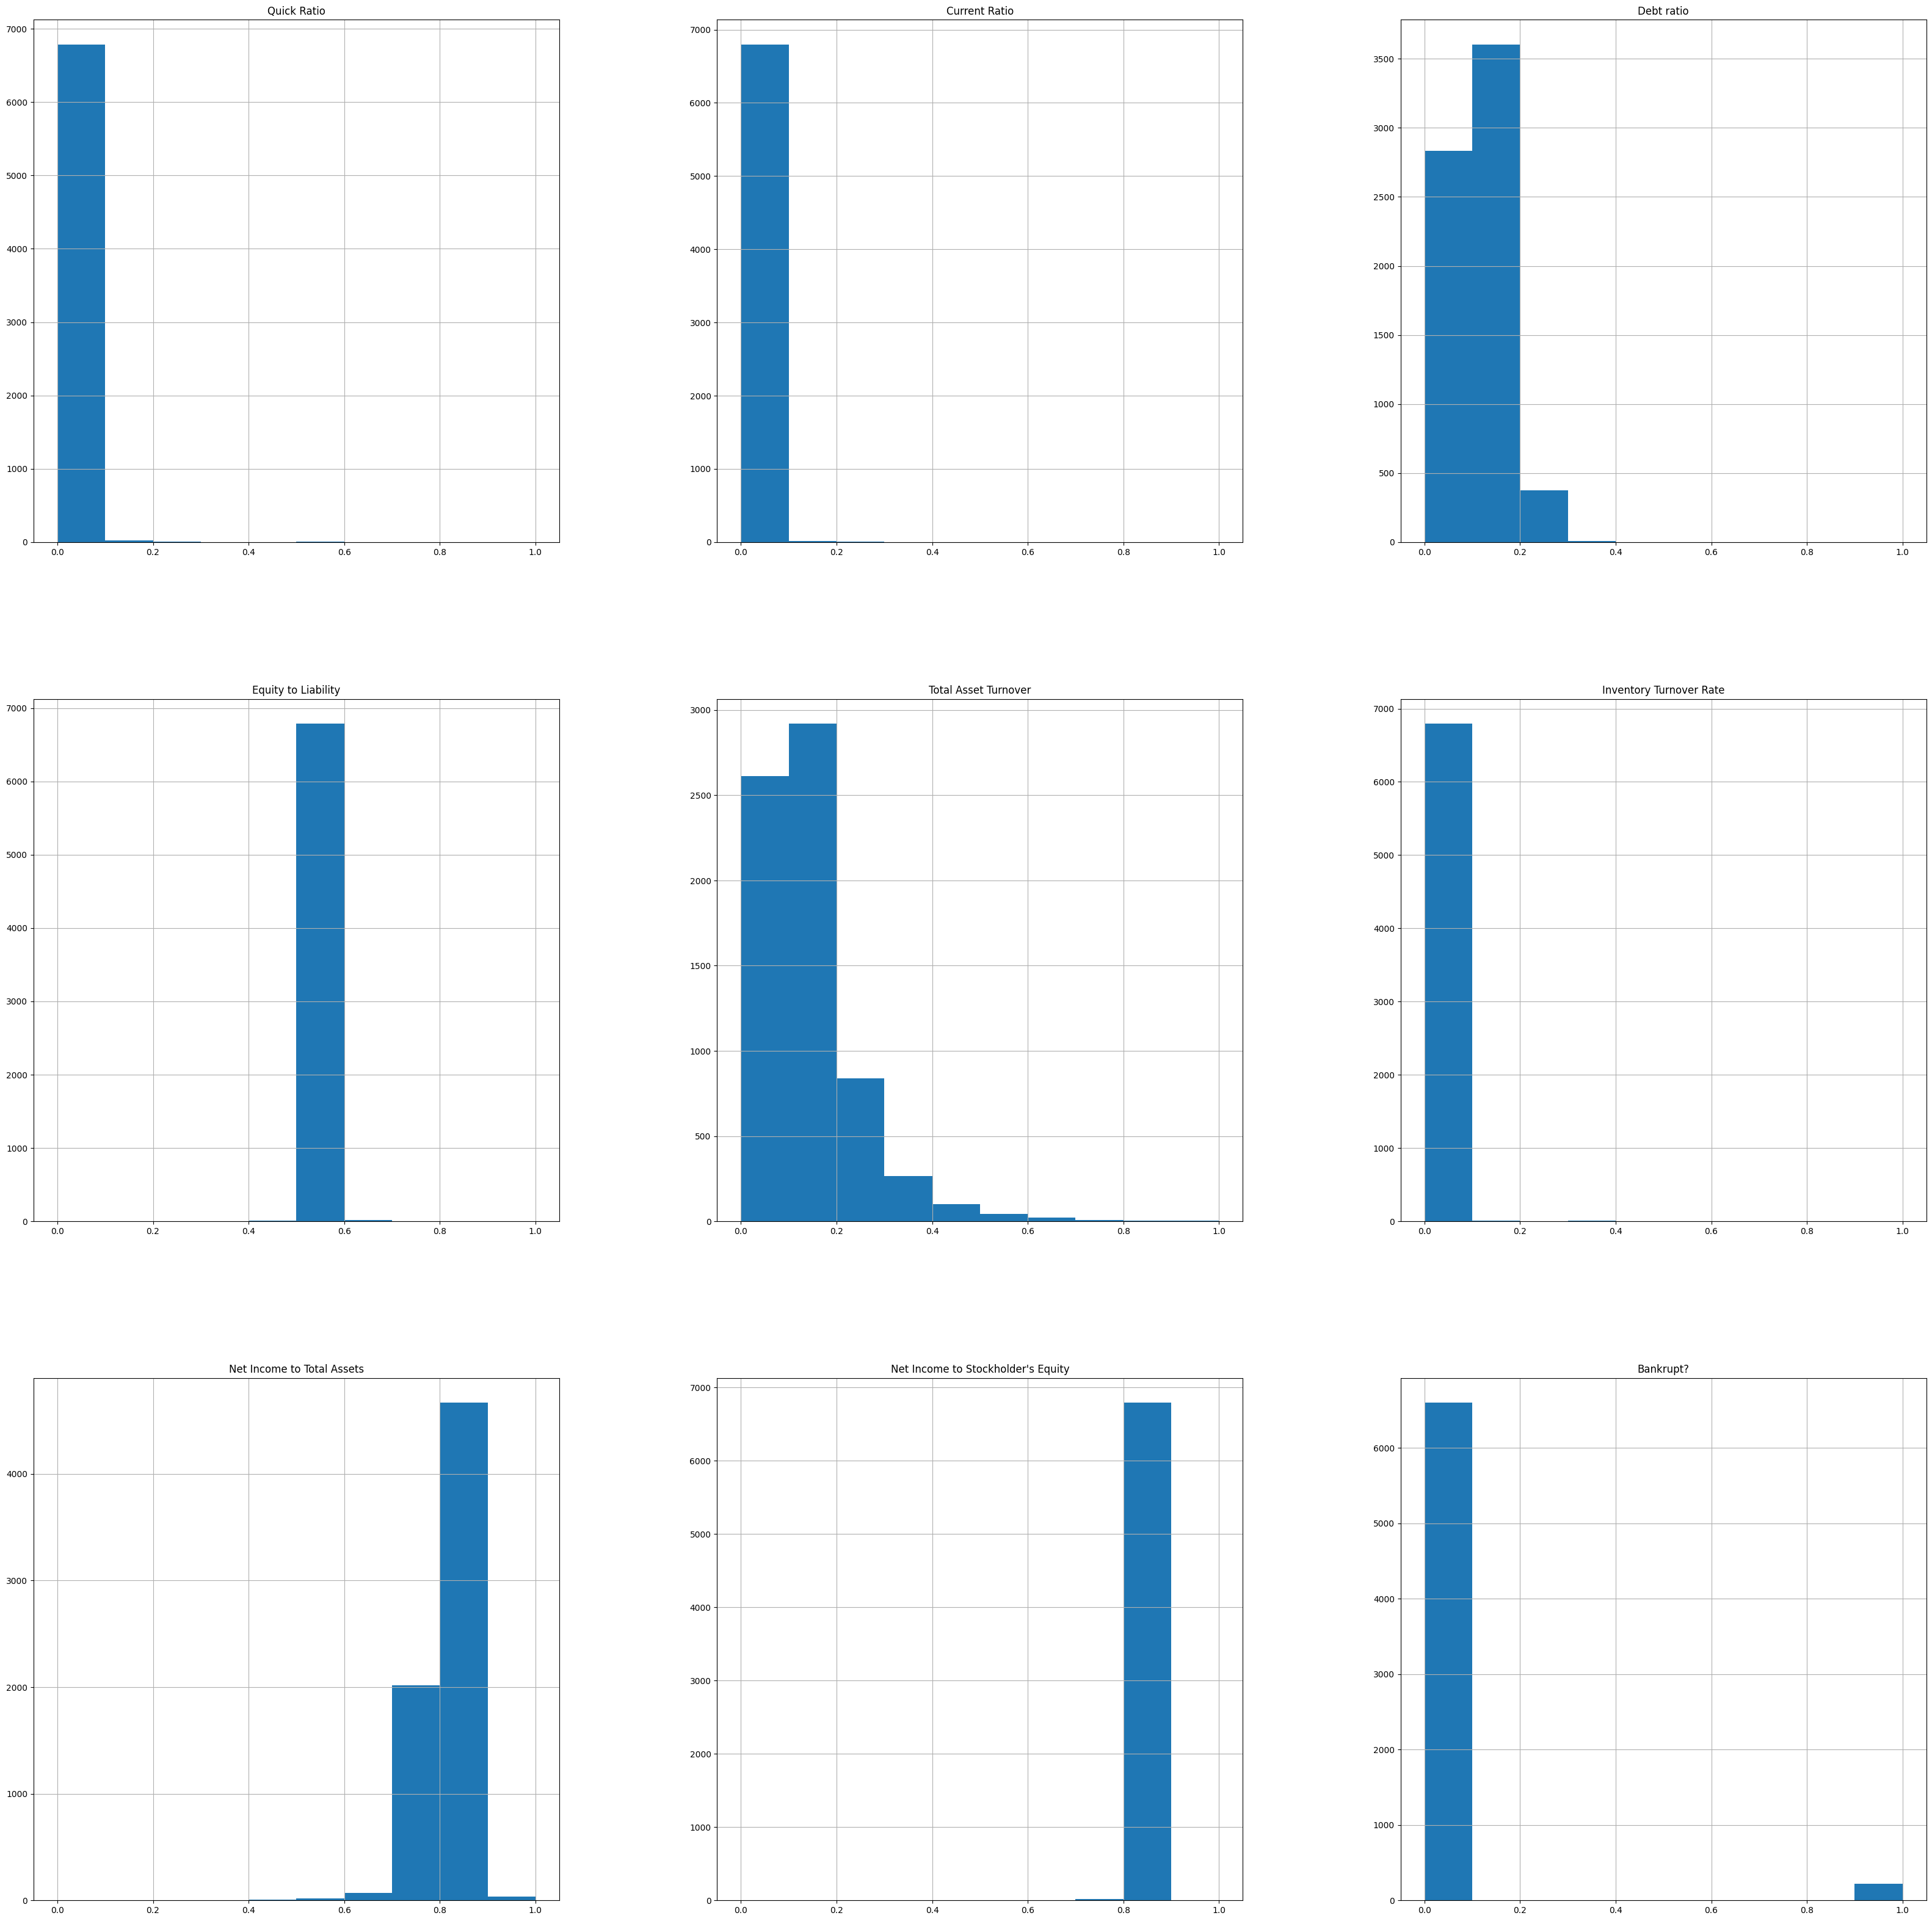

In [ ]:
df1.hist(figsize = (40,40))

In [ ]:
df1.describe()

,Quick Ratio,Current Ratio,Debt ratio,Equity to Liability,Total Asset Turnover,Inventory Turnover Rate,Net Income to Total Assets,Net Income to Stockholder's Equity,Bankrupt?
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.015105,0.011069,0.113177,0.565358,0.141606,0.001860,0.807760,0.840402,0.032263
std,0.023604,0.018342,0.053920,0.013214,0.101145,0.021973,0.040332,0.014523,0.176710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007552,0.004717,0.072891,0.565158,0.076462,0.000130,0.796750,0.840115,0.000000
50%,0.010587,0.007392,0.111407,0.565252,0.118441,0.000185,0.810619,0.841179,0.000000
75%,0.016267,0.012202,0.148804,0.565725,0.176912,0.000330,0.826455,0.842357,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


箱型图绘制

Text(0.5, 1.0, 'Quick Ratio VS Bankrupt?')

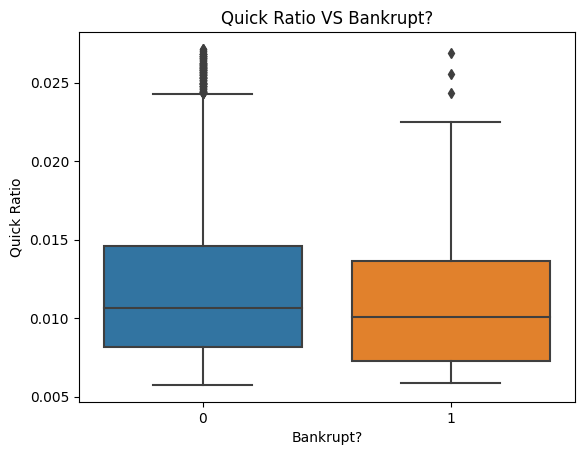

In [ ]:
q1,q9 = df1["Quick Ratio"].quantile([0.1,0.9])
mask=df1["Quick Ratio"].between(q1,q9)
g=sns.boxplot(x="Bankrupt?",y="Quick Ratio", data=df[mask])
g.set_title("Quick Ratio VS Bankrupt?")

Text(0.5, 1.0, 'Current Ratio VS Bankrupt?')

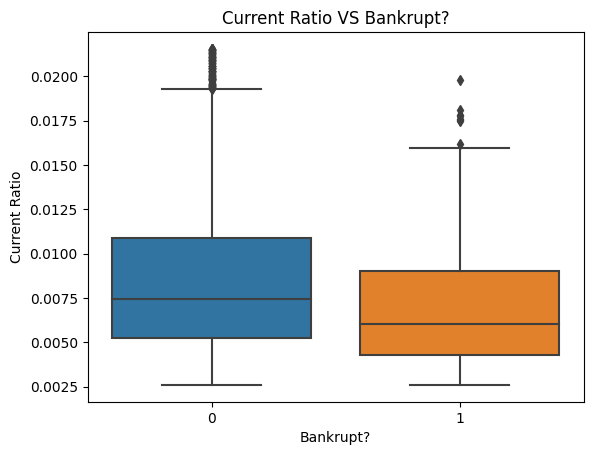

In [ ]:
q1,q9 = df1["Current Ratio"].quantile([0.1,0.9])
mask=df1["Current Ratio"].between(q1,q9)
g=sns.boxplot(x="Bankrupt?",y="Current Ratio", data=df[mask])
g.set_title("Current Ratio VS Bankrupt?")

Text(0.5, 1.0, 'Equity to Liability VS Bankrupt?')

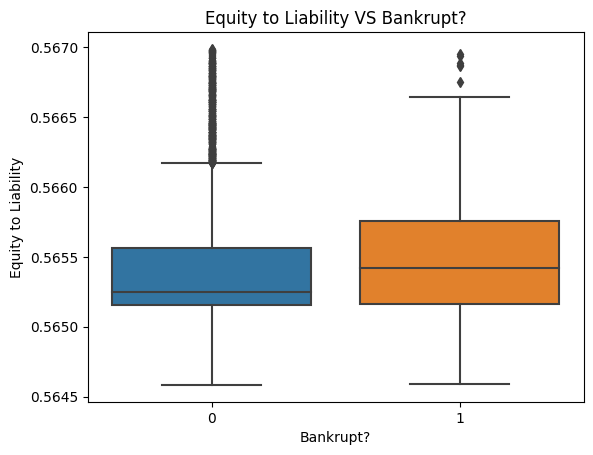

In [ ]:
q1,q9 = df1["Interest Coverage Ratio"].quantile([0.1,0.9])
mask=df1["Interest Coverage Ratio"].between(q1,q9)
g=sns.boxplot(x="Bankrupt?",y="Interest Coverage Ratio", data=df[mask])
g.set_title("Interest Coverage Ratio VS Bankrupt?")

Text(0.5, 1.0, 'Total Asset Turnover VS Bankrupt?')

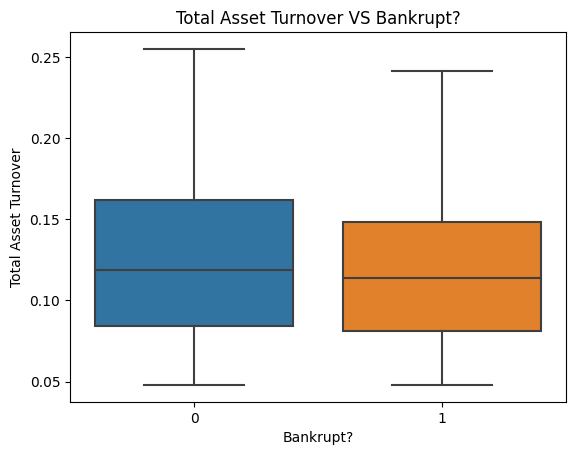

In [ ]:
q1,q9 = df1["Total Asset Turnover"].quantile([0.1,0.9])
mask=df1["Total Asset Turnover"].between(q1,q9)
g=sns.boxplot(x="Bankrupt?",y="Total Asset Turnover", data=df[mask])
g.set_title("Total Asset Turnover VS Bankrupt?")

Text(0.5, 1.0, 'Inventory Turnover Rate VS Bankrupt?')

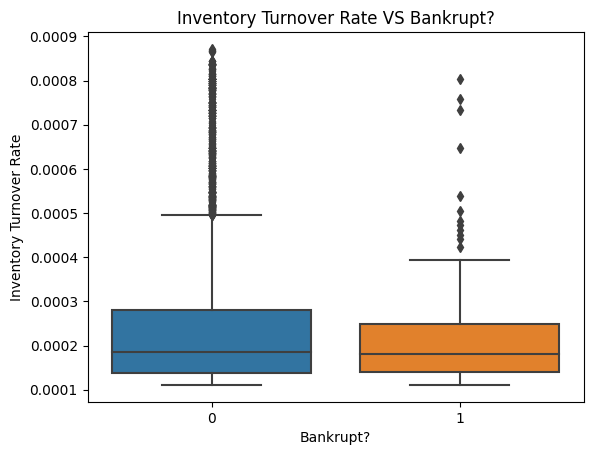

In [ ]:
q1,q9 = df1["Inventory Turnover Rate"].quantile([0.1,0.9])
mask=df1["Inventory Turnover Rate"].between(q1,q9)
g=sns.boxplot(x="Bankrupt?",y="Inventory Turnover Rate", data=df[mask])
g.set_title("Inventory Turnover Rate VS Bankrupt?")

Text(0.5, 1.0, 'Net Income to Total Assets VS Bankrupt?')

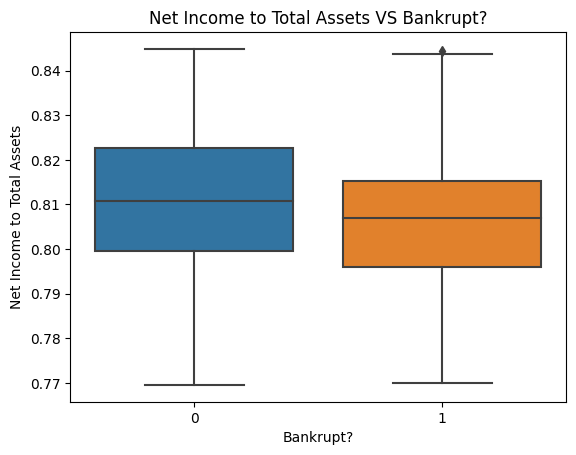

In [ ]:
q1,q9 = df1["Net Income to Total Assets"].quantile([0.1,0.9])
mask=df1["Net Income to Total Assets"].between(q1,q9)
g=sns.boxplot(x="Bankrupt?",y="Net Income to Total Assets", data=df[mask])
g.set_title("Net Income to Total Assets VS Bankrupt?")	

Text(0.5, 1.0, "Net Income to Stockholder's Equity VS Bankrupt?")

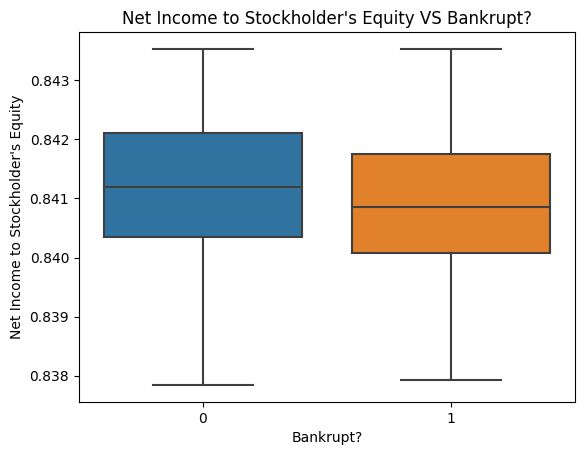

In [ ]:
q1,q9 = df1["Net Income to Stockholder's Equity"].quantile([0.1,0.9])
mask=df1["Net Income to Stockholder's Equity"].between(q1,q9)
g=sns.boxplot(x="Bankrupt?",y="Net Income to Stockholder's Equity", data=df[mask])
g.set_title("Net Income to Stockholder's Equity VS Bankrupt?")

多变量相关性分析

,Quick Ratio,Current Ratio,Debt ratio,Equity to Liability,Total Asset Turnover,Inventory Turnover Rate,Net Income to Total Assets,Net Income to Stockholder's Equity,Bankrupt?
Quick Ratio,1.000000,0.922201,-0.375667,-0.004144,-0.084904,0.013797,0.053469,0.021620,-0.011701
Current Ratio,0.922201,1.000000,-0.403841,-0.004937,-0.083479,0.026884,0.077907,0.025849,-0.018492
Debt ratio,-0.375667,-0.403841,1.000000,0.012571,0.237235,-0.045436,-0.281422,-0.123986,0.016926
Equity to Liability,-0.004144,-0.004937,0.012571,1.000000,0.019351,-0.000490,0.012746,0.005147,-0.044874
Total Asset Turnover,-0.084904,-0.083479,0.237235,0.019351,1.000000,0.003848,0.188794,0.041239,-0.029591
Inventory Turnover Rate,0.013797,0.026884,-0.045436,-0.000490,0.003848,1.000000,0.029067,0.006748,-0.011529
Net Income to Total Assets,0.053469,0.077907,-0.281422,0.012746,0.188794,0.029067,1.000000,0.328492,-0.028227
Net Income to Stockholder's Equity,0.021620,0.025849,-0.123986,0.005147,0.041239,0.006748,0.328492,1.000000,-0.017456
Bankrupt?,-0.011701,-0.018492,0.016926,-0.044874,-0.029591,-0.011529,-0.028227,-0.017456,1.000000


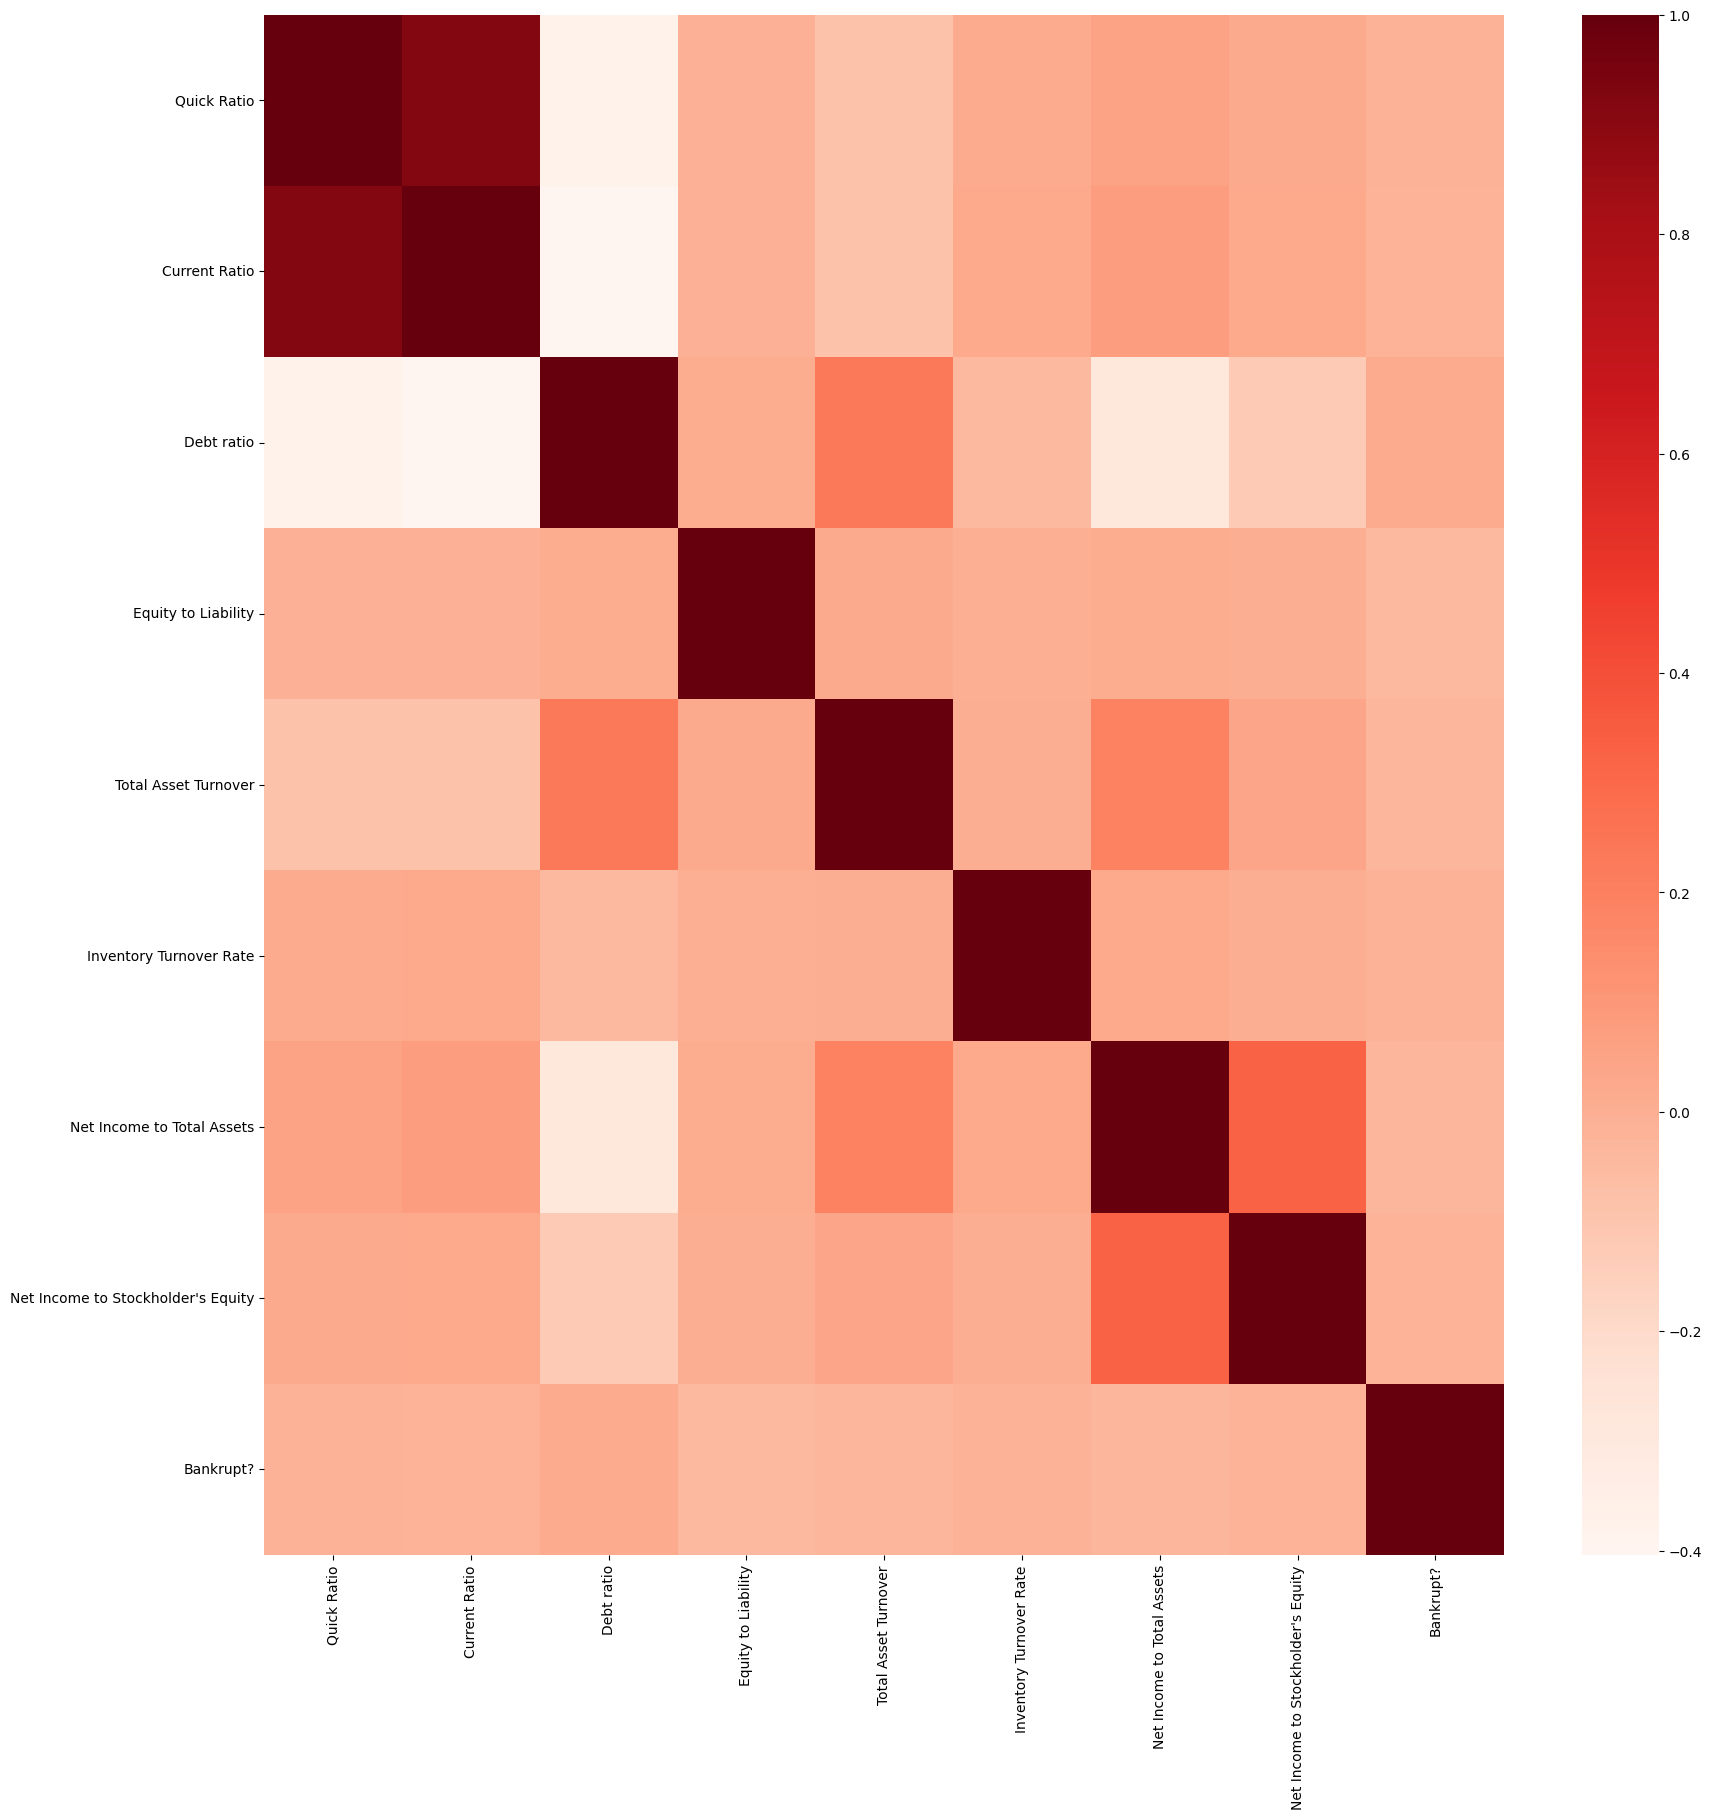

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df1.corr(), cmap = "Reds")
df1.corr()